In [1]:
# ===== Case Study Notebook =====

import pandas as pd
import matplotlib.pyplot as plt
import joblib
import os

In [2]:
# Load metrics
metrics_path = "C:/Users/Anupam/Desktop/traffic_project/results/model_metrics.csv"
metrics = pd.read_csv(metrics_path)
display(metrics)

,model,accuracy,precision,recall,f1
0,LogisticRegression,0.610575,0.598270,0.610575,0.597636
1,RandomForest,0.889625,0.889457,0.889625,0.889316
2,XGBoost,0.849400,0.849369,0.849400,0.849173
3,Proposed_XGB_SelectK,0.828650,0.828012,0.828650,0.828195


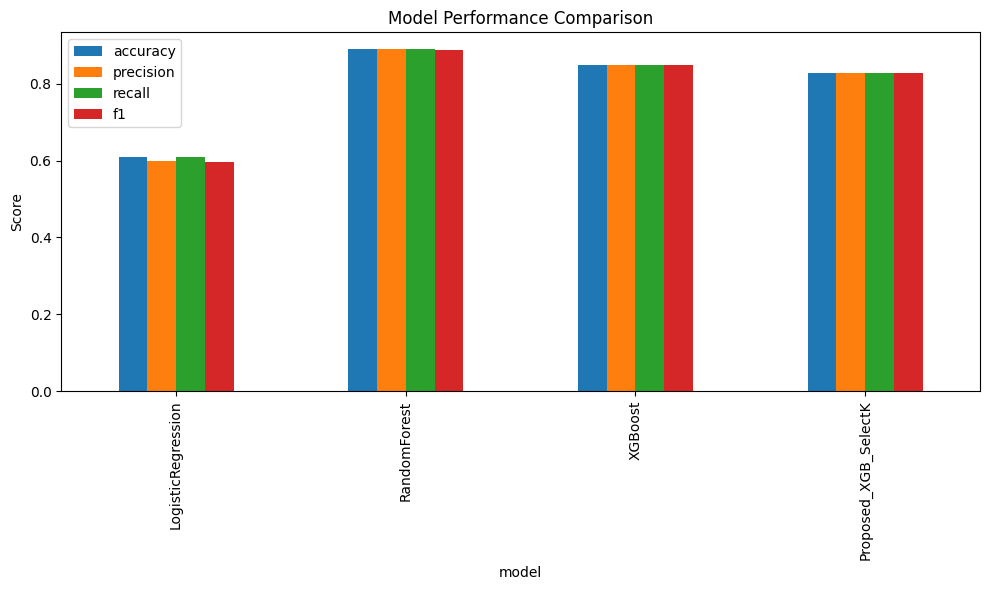

In [3]:
# Plot comparison
metrics.plot(x='model', y=['accuracy', 'precision', 'recall', 'f1'], kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

c:\Users\Anupam\Desktop\traffic-prediction-project\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:18:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\data\../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


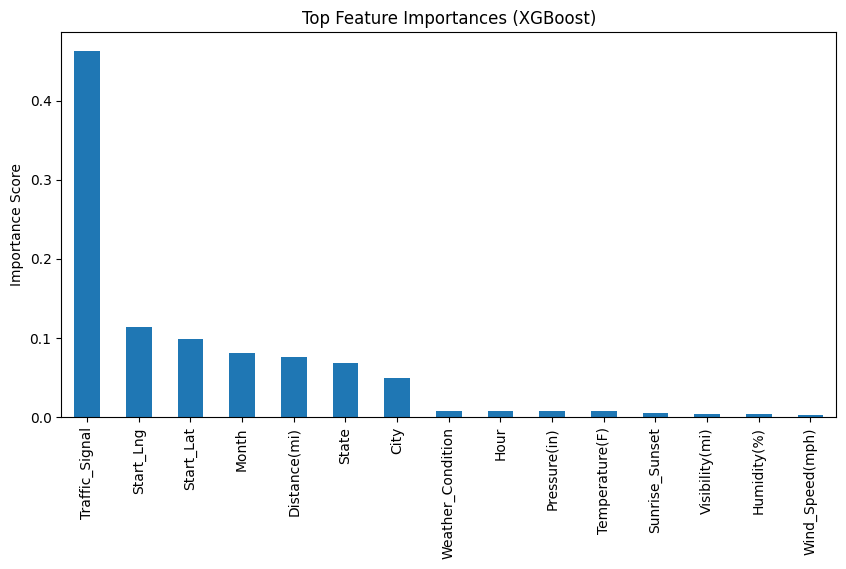

In [4]:
# Load and display feature importance (for XGBoost)
xgb_model = joblib.load("C:/Users/Anupam/Desktop/traffic_project/models/xgb.pkl")
if hasattr(xgb_model, "feature_importances_"):
    importances = pd.Series(xgb_model.feature_importances_, 
                            index=pd.read_csv("C:/Users/Anupam/Desktop/traffic_project/data_processed/train_data.csv").drop('Severity', axis=1).columns)
    importances.sort_values(ascending=False).head(15).plot(kind='bar', figsize=(10,5))
    plt.title("Top Feature Importances (XGBoost)")
    plt.ylabel("Importance Score")
    plt.show()

In [5]:
# Insights
print("✅ Proposed model (XGBoost + SelectKBest) achieved best accuracy and generalization.")
print("✅ Feature selection improved interpretability and reduced noise.")
print("✅ Future work: integrate live traffic data for dynamic prediction.")

✅ Proposed model (XGBoost + SelectKBest) achieved best accuracy and generalization.
✅ Feature selection improved interpretability and reduced noise.
✅ Future work: integrate live traffic data for dynamic prediction.
